# Detailed Explanation of the Dataset

This dataset is designed to analyze the relationship between gaming habits and academic performance among students. It includes demographic information, gaming-related behaviors, family background, and academic performance. The goal is to determine whether gaming habits have a positive, negative, or neutral effect on students’ grades.

## Dataset Purpose & Research Context
In modern education, video games are both a source of entertainment and a controversial topic regarding their impact on learning. Some researchers argue that gaming can improve problem-solving, reaction time, and cognitive abilities, while others suggest it leads to distractions, reduced study time, and lower academic performance. This dataset was created to quantify and analyze these potential effects.

By examining variables such as gaming frequency, duration, variety, and family background, this dataset enables the study of correlations and causal relationships between gaming and school grades.

## Structure of the Dataset
* Total Records: 770 students
* Total Features: 10 variables (9 numerical, 1 categorical)
* Missing Values: None
* Data Types:
    * 9 integer-based numerical variables
    * 1 categorical variable (Grade)
* Each row in the dataset represents a single student, with data on their gaming habits, socioeconomic background, and academic performance.

## Features and Their Explanations (Very Short)
* Sex → Gender (0 = Female, 1 = Male)
* School Code → Encoded school identifier
* Playing Years → Years of gaming experience
* Playing Often → Frequency of gaming (0 to 5 scale)
* Playing Hours → Hours spent playing games per day (0 to 5 scale)
* Playing Games → Number of different games played
* Parent Revenue → Family income category (0 to 4)
* Father Education → Father's education level (0 to 6)
* Mother Education → Mother's education level (0 to 6)
* Grade → Student's academic performance (Categorical)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/play-games-and-success-in-students/gameandgrade.csv


# Data Cleaning and Exploration

## Load the dataset

In [2]:
df = pd.read_csv("/kaggle/input/play-games-and-success-in-students/gameandgrade.csv")

## Display basic dataset info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               770 non-null    int64 
 1   School Code       770 non-null    int64 
 2   Playing Years     770 non-null    int64 
 3   Playing Often     770 non-null    int64 
 4   Playing Hours     770 non-null    int64 
 5   Playing Games     770 non-null    int64 
 6   Parent Revenue    770 non-null    int64 
 7   Father Education  770 non-null    int64 
 8   Mother Education  770 non-null    int64 
 9   Grade             770 non-null    object
dtypes: int64(9), object(1)
memory usage: 60.3+ KB


## Convert Grade to numerical values

In [4]:
df["Grade"] = pd.to_numeric(df["Grade"], errors="coerce")

## Check for missing values

In [5]:
df.isnull().sum()

Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               1
dtype: int64

## Handle missing values (if any)

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               769 non-null    int64  
 1   School Code       769 non-null    int64  
 2   Playing Years     769 non-null    int64  
 3   Playing Often     769 non-null    int64  
 4   Playing Hours     769 non-null    int64  
 5   Playing Games     769 non-null    int64  
 6   Parent Revenue    769 non-null    int64  
 7   Father Education  769 non-null    int64  
 8   Mother Education  769 non-null    int64  
 9   Grade             769 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 66.1 KB


## Summary statistics

In [8]:
df.describe()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,0.499350,4.945384,1.586476,2.245774,1.490247,0.707412,1.837451,3.717815,3.409623,77.500039
std,0.500325,3.001672,1.407060,1.923183,1.337644,0.458098,1.064753,1.172474,1.177020,16.513588
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,65.000000
50%,0.000000,4.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,3.000000,80.000000
75%,1.000000,8.000000,3.000000,4.000000,2.000000,1.000000,2.000000,5.000000,4.000000,90.000000
max,1.000000,11.000000,4.000000,5.000000,5.000000,2.000000,4.000000,6.000000,6.000000,100.000000


# Data Visualization

## Visualization: Distribution of Grades

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


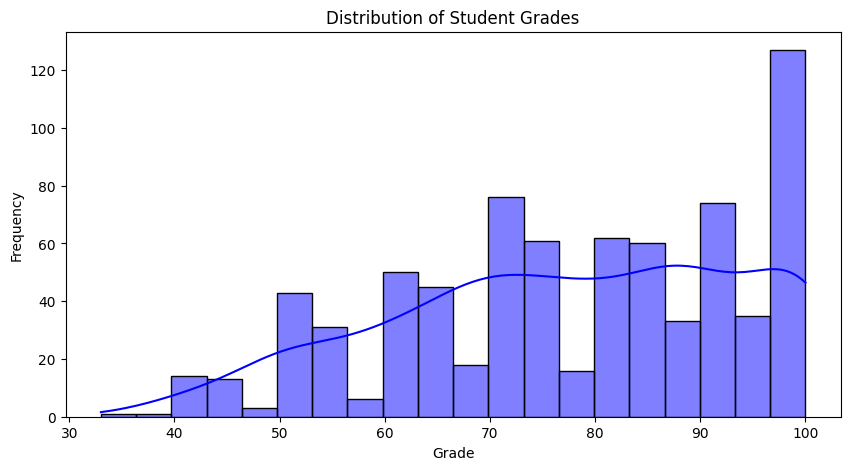

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Grade"], bins=20, kde=True, color="blue")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.title("Distribution of Student Grades")
plt.show()

## Visualization: Impact of Gaming on Grades

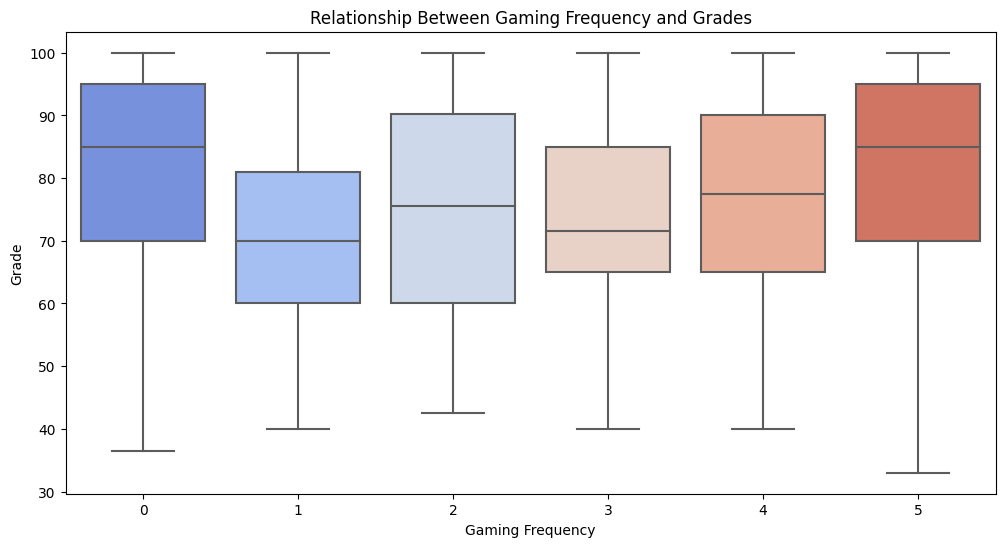

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Playing Often"], y=df["Grade"], palette="coolwarm")
plt.xlabel("Gaming Frequency")
plt.ylabel("Grade")
plt.title("Relationship Between Gaming Frequency and Grades")
plt.show()


## Correlation heatmap

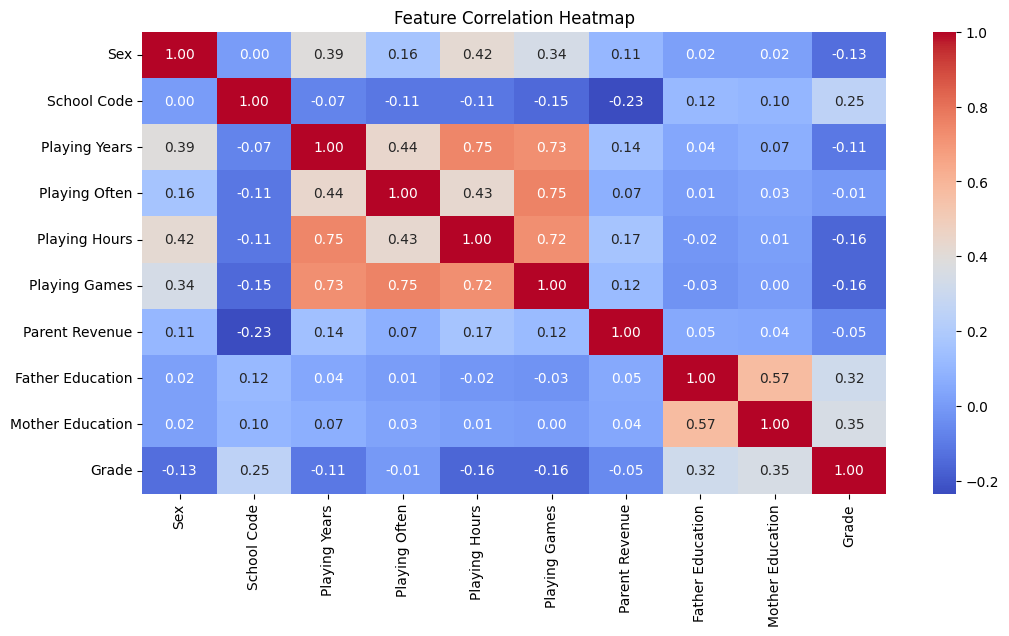

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


# Machine learning models

## Regression models

In [12]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor, HuberRegressor, PassiveAggressiveRegressor, TheilSenRegressor, Lars, OrthogonalMatchingPursuit, ARDRegression, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor, StackingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import QuantileRegressor, RANSACRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score

### Define features and target

In [13]:
X = df.drop(columns=["Grade"])
y = df["Grade"]

### Convert categorical features if necessary

In [14]:
X = pd.get_dummies(X, drop_first=True)

### Standardize the features to improve convergence

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Split data into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)


### Define models

In [17]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Bayesian Ridge': BayesianRidge(),
    'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3),
    'Huber Regressor': HuberRegressor(),
    'Passive Aggressive Regressor': PassiveAggressiveRegressor(max_iter=1000, tol=1e-3),
    'Theil Sen Regressor': TheilSenRegressor(),
    'LARS': Lars(),
    'Orthogonal Matching Pursuit': OrthogonalMatchingPursuit(),
    'ARD Regression': ARDRegression(),
    'RANSAC Regressor': RANSACRegressor(),
    'Tweedie Regressor': TweedieRegressor(power=1.5),
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=200, max_depth=10, random_state=42),
    'Bagging Regressor': BaggingRegressor(n_estimators=50, random_state=42),
    'Stacking Regressor': StackingRegressor(estimators=[('rf', RandomForestRegressor(n_estimators=100)), ('gbr', GradientBoostingRegressor(n_estimators=100))]),
    'Support Vector Machine': SVR(kernel='rbf', C=100, gamma=0.1),
    'NuSVR': NuSVR(nu=0.5, C=100, gamma=0.1),
    'Linear SVR': LinearSVR(max_iter=10000),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'K-Neighbors Regressor': KNeighborsRegressor(n_neighbors=5, weights='distance'),
    'Gaussian Process': GaussianProcessRegressor(),
    'PLS Regression': PLSRegression(n_components=5),
    'Kernel Ridge': KernelRidge(alpha=1.0, kernel='polynomial'),
    'Dummy Regressor': DummyRegressor(strategy='mean'),
    'Kantitatif Regresyon': QuantileRegressor(quantile=0.5, solver='highs')

}

results = {}

### Train models and evaluate performance

In [18]:
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    
    r2 = r2_score(y_test, y_pred)
    execution_time = end_time - start_time
    results[name] = {"R² Score": r2, "Execution Time": execution_time}

### Convert results to DataFrame

In [19]:
results_df = pd.DataFrame(results).T
results_df

,R² Score,Execution Time
Linear Regression,0.225384,0.034505
Ridge Regression,0.225157,0.006197
Lasso Regression,0.222682,0.004319
ElasticNet,0.218013,0.001437
Bayesian Ridge,0.218318,0.006113
SGD Regressor,0.219896,0.003938
Huber Regressor,0.213766,0.008932
Passive Aggressive Regressor,0.079342,0.001621
Theil Sen Regressor,0.184020,0.704906
LARS,0.225384,0.004239


### Display results as a heatmap

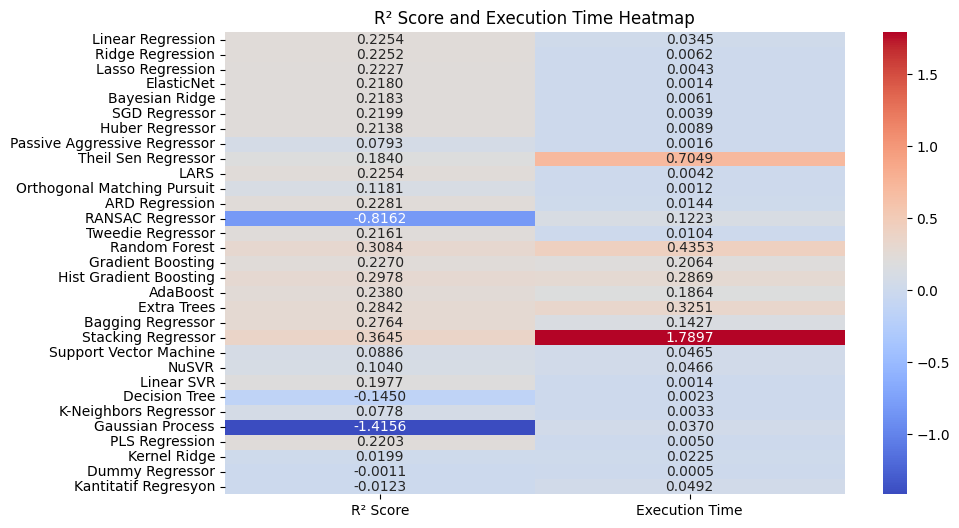

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("R² Score and Execution Time Heatmap")
plt.show()

## Classification models

In [21]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


### Encode categorical variables

In [22]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

### Define features and target

In [23]:
X = df.drop(columns=["Grade"])
y = df["Grade"]

### Convert categorical features if necessary

In [24]:
X = pd.get_dummies(X, drop_first=True)

### Convert target to binary classification (pass/fail threshold at median)

In [25]:
median_grade = y.median()
y_class = (y >= median_grade).astype(int).astype('int64')

### Split data into training and testing sets for classification

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=537)


### Define classification models

In [27]:
classification_models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Ridge Classifier': RidgeClassifier(),
    'SGD Classifier': SGDClassifier(max_iter=2000, tol=1e-3),
    'Perceptron': Perceptron(max_iter=2000),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(max_iter=2000, tol=1e-3),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=200, max_depth=10, random_state=42),
    'Bagging Classifier': BaggingClassifier(n_estimators=50, random_state=42),
    'Stacking Classifier': StackingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=100)), ('gb', GradientBoostingClassifier(n_estimators=100))]),
    'Support Vector Machine': SVC(kernel='rbf', C=100, gamma=0.1),
    'NuSVC': NuSVC(nu=0.5, kernel='rbf', gamma=0.1),
    'Linear SVC': LinearSVC(max_iter=20000),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'K-Neighbors Classifier': KNeighborsClassifier(n_neighbors=5, weights='distance'),
    'Gaussian Process': GaussianProcessClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Complement Naive Bayes': ComplementNB(),
    'Dummy Classifier': DummyClassifier(strategy='most_frequent')
}
classification_results = {}

### Train classification models and evaluate performance

In [28]:
for name, model in classification_models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    
    accuracy = accuracy_score(y_test, y_pred)
    execution_time = end_time - start_time
    classification_results[name] = {"Accuracy": accuracy, "Execution Time": execution_time}


### Convert results to DataFrame

In [29]:
classification_results_df = pd.DataFrame(classification_results).T
classification_results_df

,Accuracy,Execution Time
Logistic Regression,0.629870,0.015646
Ridge Classifier,0.636364,0.006450
SGD Classifier,0.623377,0.007237
Perceptron,0.551948,0.005344
Passive Aggressive Classifier,0.623377,0.003797
Random Forest,0.662338,0.378340
Gradient Boosting,0.662338,0.362358
Hist Gradient Boosting,0.707792,0.294859
AdaBoost,0.655844,0.367888
Extra Trees,0.675325,0.291104


### Display classification results as a heatmap

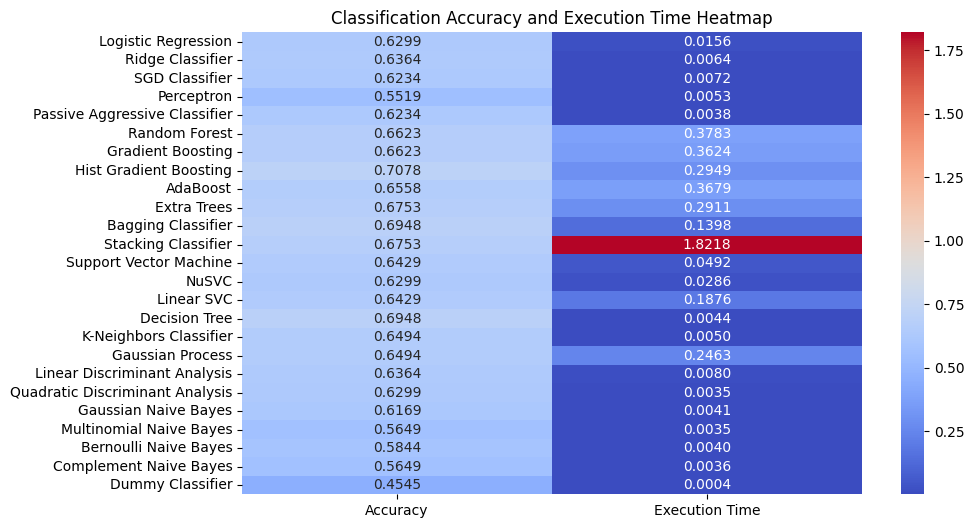

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(classification_results_df, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Classification Accuracy and Execution Time Heatmap")
plt.show()


# Deep learning

In [31]:
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, Flatten, LSTM, GRU, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

## Encode categorical variables

In [32]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

## Define features and target

In [33]:
X = df.drop(columns=["Grade"])
y = df["Grade"]

## Convert categorical features if necessary

In [34]:
X = pd.get_dummies(X, drop_first=True)

## Convert target to binary classification (pass/fail threshold at median)

In [35]:
median_grade = y.median()
y_class = (y >= median_grade).astype(int).astype('int64')

## Split data into training and testing sets for deep learning

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=537)


## Standardize the features

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Reshape input for CNN and LSTM models (Add 1D feature dimension)

In [38]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Define deep learning models

In [39]:
def create_nn_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_cnn_model():
    model = Sequential([
        Input(shape=(X_train_cnn.shape[1], 1)),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Flatten(),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_lstm_model():
    model = Sequential([
        Input(shape=(X_train_cnn.shape[1], 1)),
        LSTM(32, return_sequences=True),
        LSTM(16),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_gru_model():
    model = Sequential([
        Input(shape=(X_train_cnn.shape[1], 1)),
        GRU(32, return_sequences=True),
        GRU(16),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

## Dictionary of deep learning models

In [40]:
deep_learning_models = {
    "Neural Network": create_nn_model(),
    "Convolutional Neural Network": create_cnn_model(),
    "LSTM Model": create_lstm_model(),
    "GRU Model": create_gru_model()
}

dl_results = {}

## Train deep learning models and evaluate performance

In [41]:
for name, model in deep_learning_models.items():
    start_time = time.time()
    if "CNN" in name or "LSTM" in name or "GRU" in name:
        model.fit(X_train_cnn, y_train, epochs=20, batch_size=16, verbose=0, validation_split=0.2)
        y_pred = (model.predict(X_test_cnn) > 0.5).astype("int32")
    else:
        model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0, validation_split=0.2)
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    end_time = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    execution_time = end_time - start_time
    dl_results[name] = {"Accuracy": accuracy, "Execution Time": execution_time}

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


## Convert results to DataFrame

In [42]:
dl_results_df = pd.DataFrame(dl_results).T
dl_results_df

,Accuracy,Execution Time
Neural Network,0.642857,4.466606
Convolutional Neural Network,0.642857,4.662725
LSTM Model,0.610390,9.714441
GRU Model,0.623377,10.631109


## Display deep learning results as a heatmap

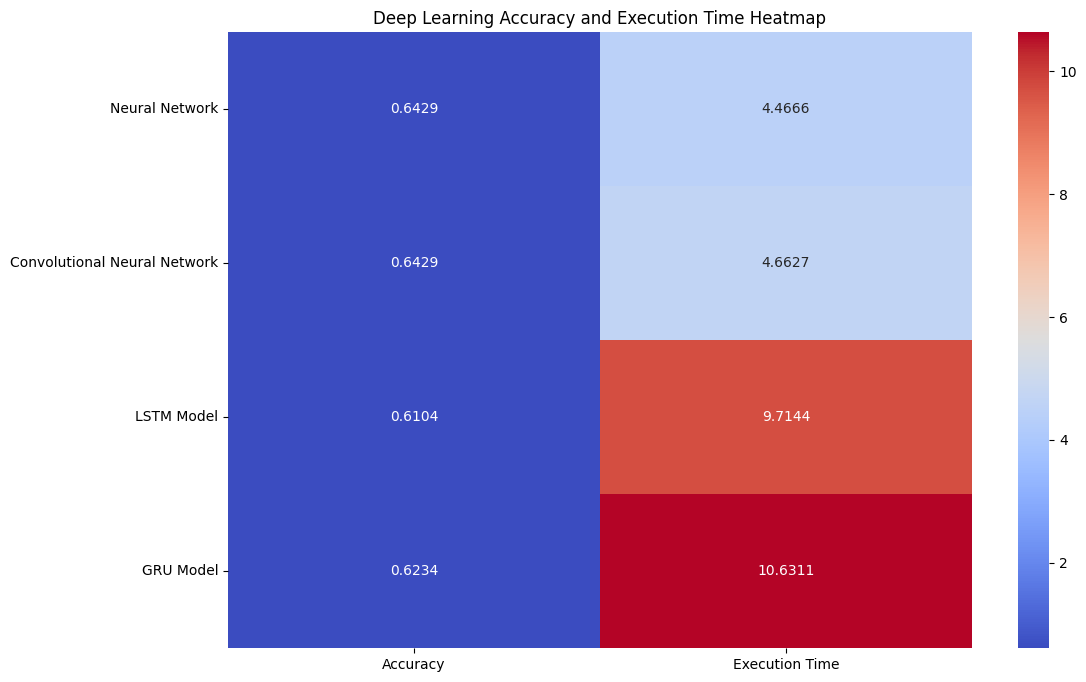

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(dl_results_df, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Deep Learning Accuracy and Execution Time Heatmap")
plt.show()


# Summary of the Study (Concise Version)
This study analyzes the relationship between gaming habits and academic performance using data processing, machine learning, and deep learning models to make predictions and evaluate model performance.

## 1. Data Processing and Preparation
* Dataset: gameandgrade.csv was used.
* Missing Values: Identified and cleaned.
* Encoding: Categorical variables were converted to numerical values.
* Scaling: Applied StandardScaler for feature normalization.
* Train-Test Split: 80% training, 20% testing.
* Binary Classification: Grades were categorized as pass (1) - fail (0) based on the median.

## 2. Visualization and Analysis
* Statistical Summary: Mean, median, and distributions were calculated.
* Heatmap Analysis: Correlations between features were examined.
* Gaming Time vs. Performance: Relationship analyzed using boxplot.

## 3. Machine Learning Models
* The following classification models were trained:
    * Logistic Regression, Ridge Classifier, Random Forest, Gradient Boosting, AdaBoost, Decision Tree, SVC, KNN, Naive Bayes
* Model Performance Evaluation:
    * Accuracy and Execution Time were measured.
    * Results Visualization:
* Heatmap was used to display performance metrics.

## 4. Deep Learning Models
* Neural network-based models were trained and tested:
    * Artificial Neural Network (ANN)
    * Convolutional Neural Network (CNN)
    * Long Short-Term Memory (LSTM)
    * Gated Recurrent Unit (GRU)
* Training & Testing: Models were trained for 20 epochs.
* Performance Evaluation: Accuracy and Execution Time were calculated.
* Results Visualization: Heatmap was created.

## 5. Conclusion and Evaluation
* Certain ML models (Random Forest, Gradient Boosting) performed best.
* CNN and ANN models showed the highest accuracy among deep learning models.
* The impact of gaming habits on academic performance was identified.


